# Drawing for vector paraxial fields

For vector fields, there are special drawings. Here we explain how to extract information from these drawings

In [1]:
from diffractio import degrees, mm, nm, np, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY

from diffractio.utils_drawing import concatenate_drawings, draw_several_fields

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=[8,6]
rcParams['figure.dpi']=125

# Definition of a vector wave

In [3]:
length = 500 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-200*um, 200*um, 512)
y0 = np.linspace(-200*um, 200*um, 512)

u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(A=1, r0=(0,0), w0=(100*um,100*um))

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.radial_wave(u=u0, r0=(0,0), radius=(200,200))
EM.RS(z=10*mm, new_field=False)

Ex,Ey=EM.get()

EM.reduce_matrix=''

## Draw intensity

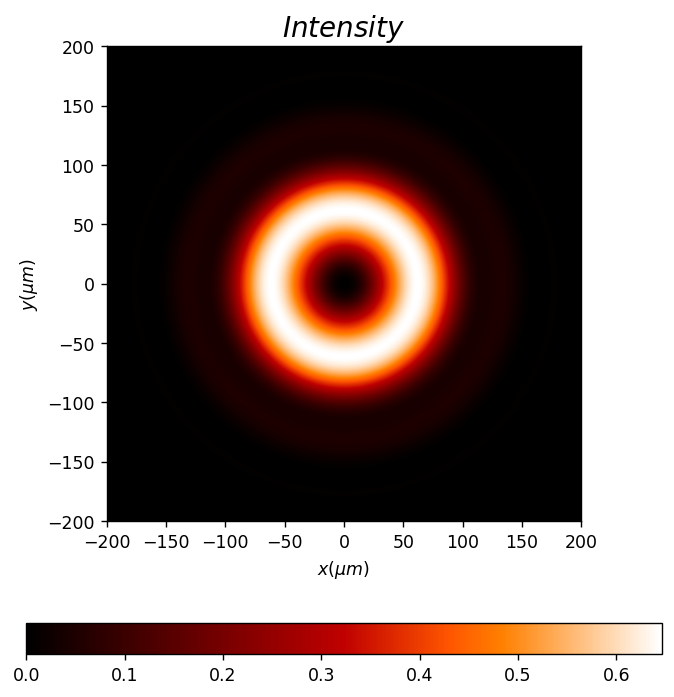

In [4]:
#EM.__draw_intensity__();
EM.draw(kind='intensity');

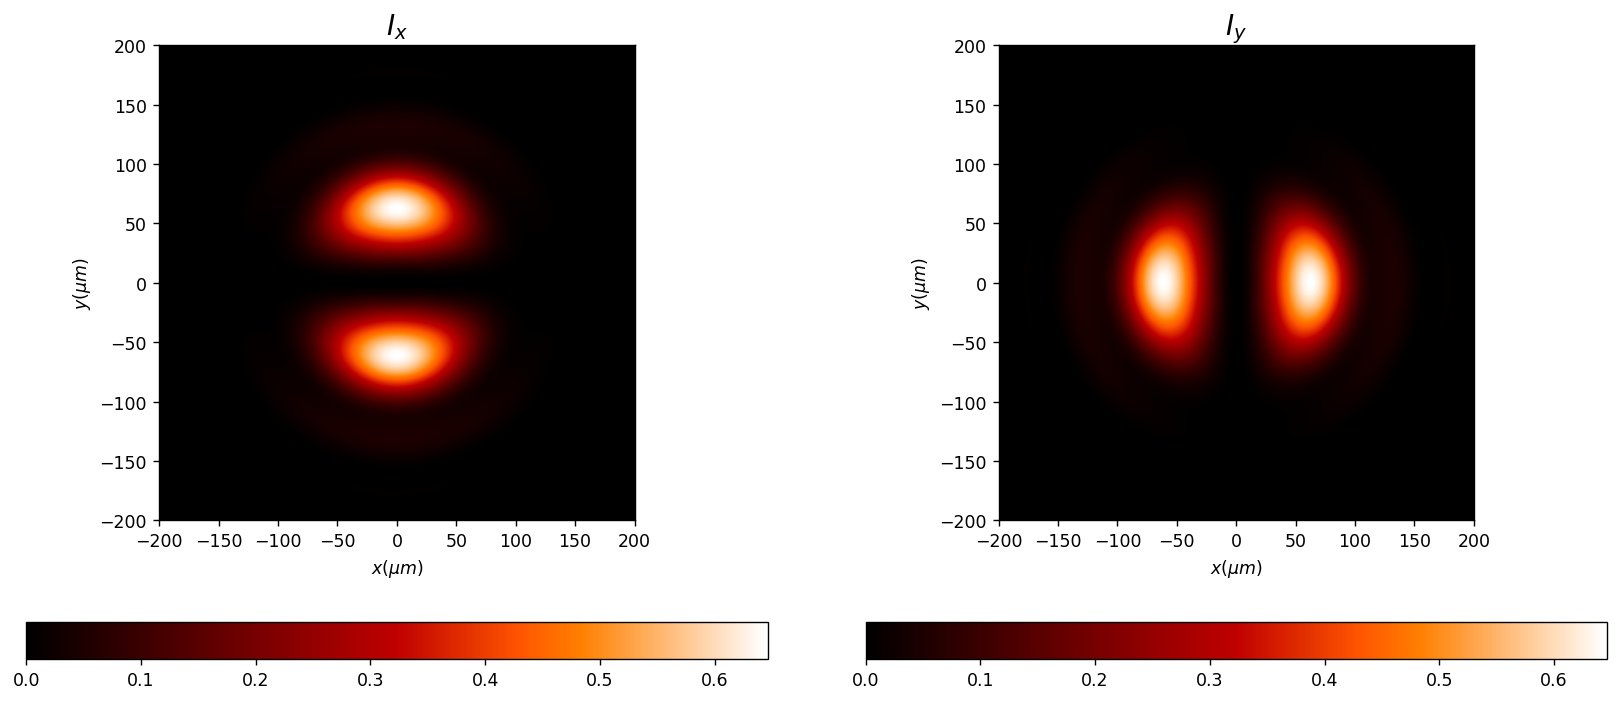

In [5]:
#EM.__draw_intensities__();
EM.draw(kind='intensities');

## Draw phase

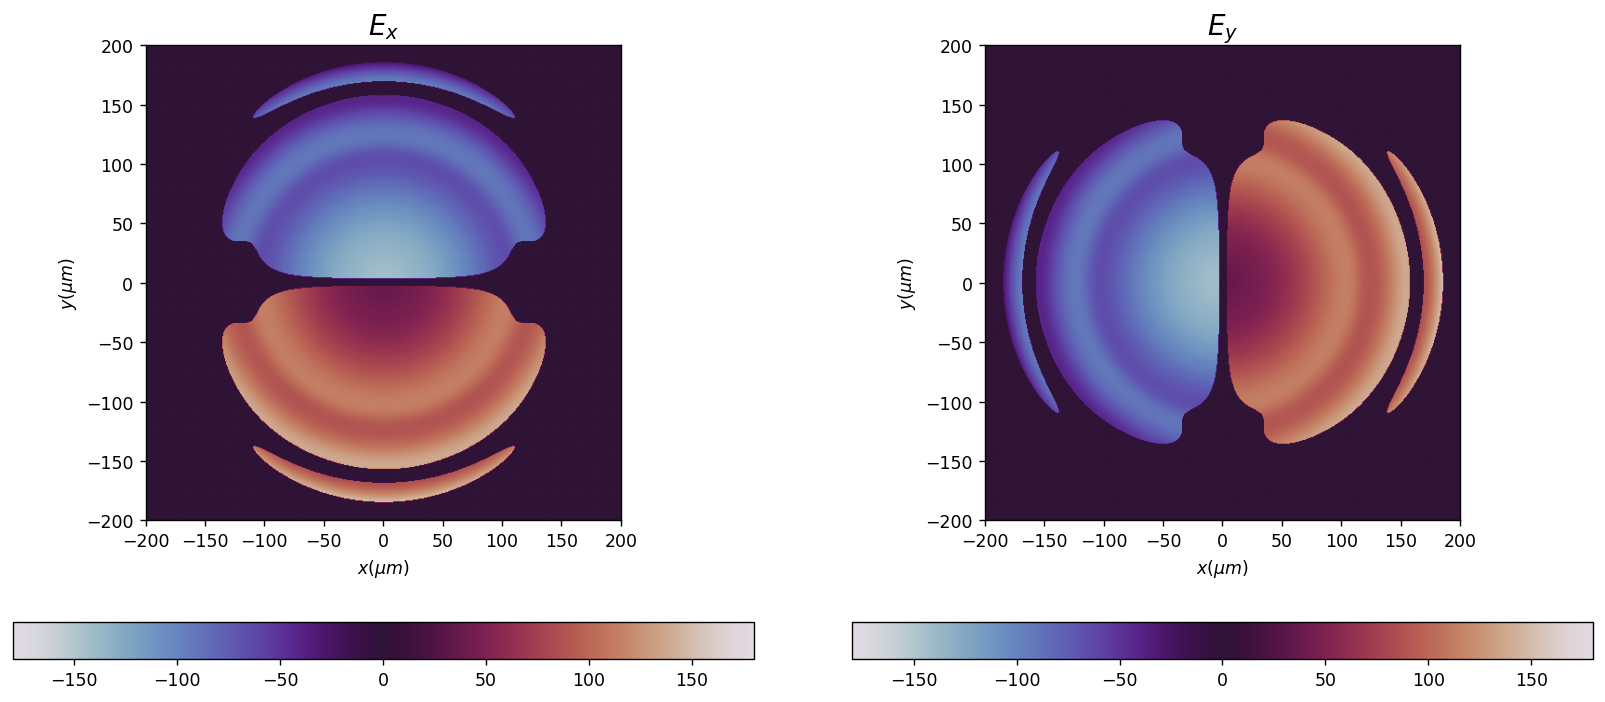

In [6]:
#EM.__draw_phases__();
EM.draw(kind='phases');

## draw field

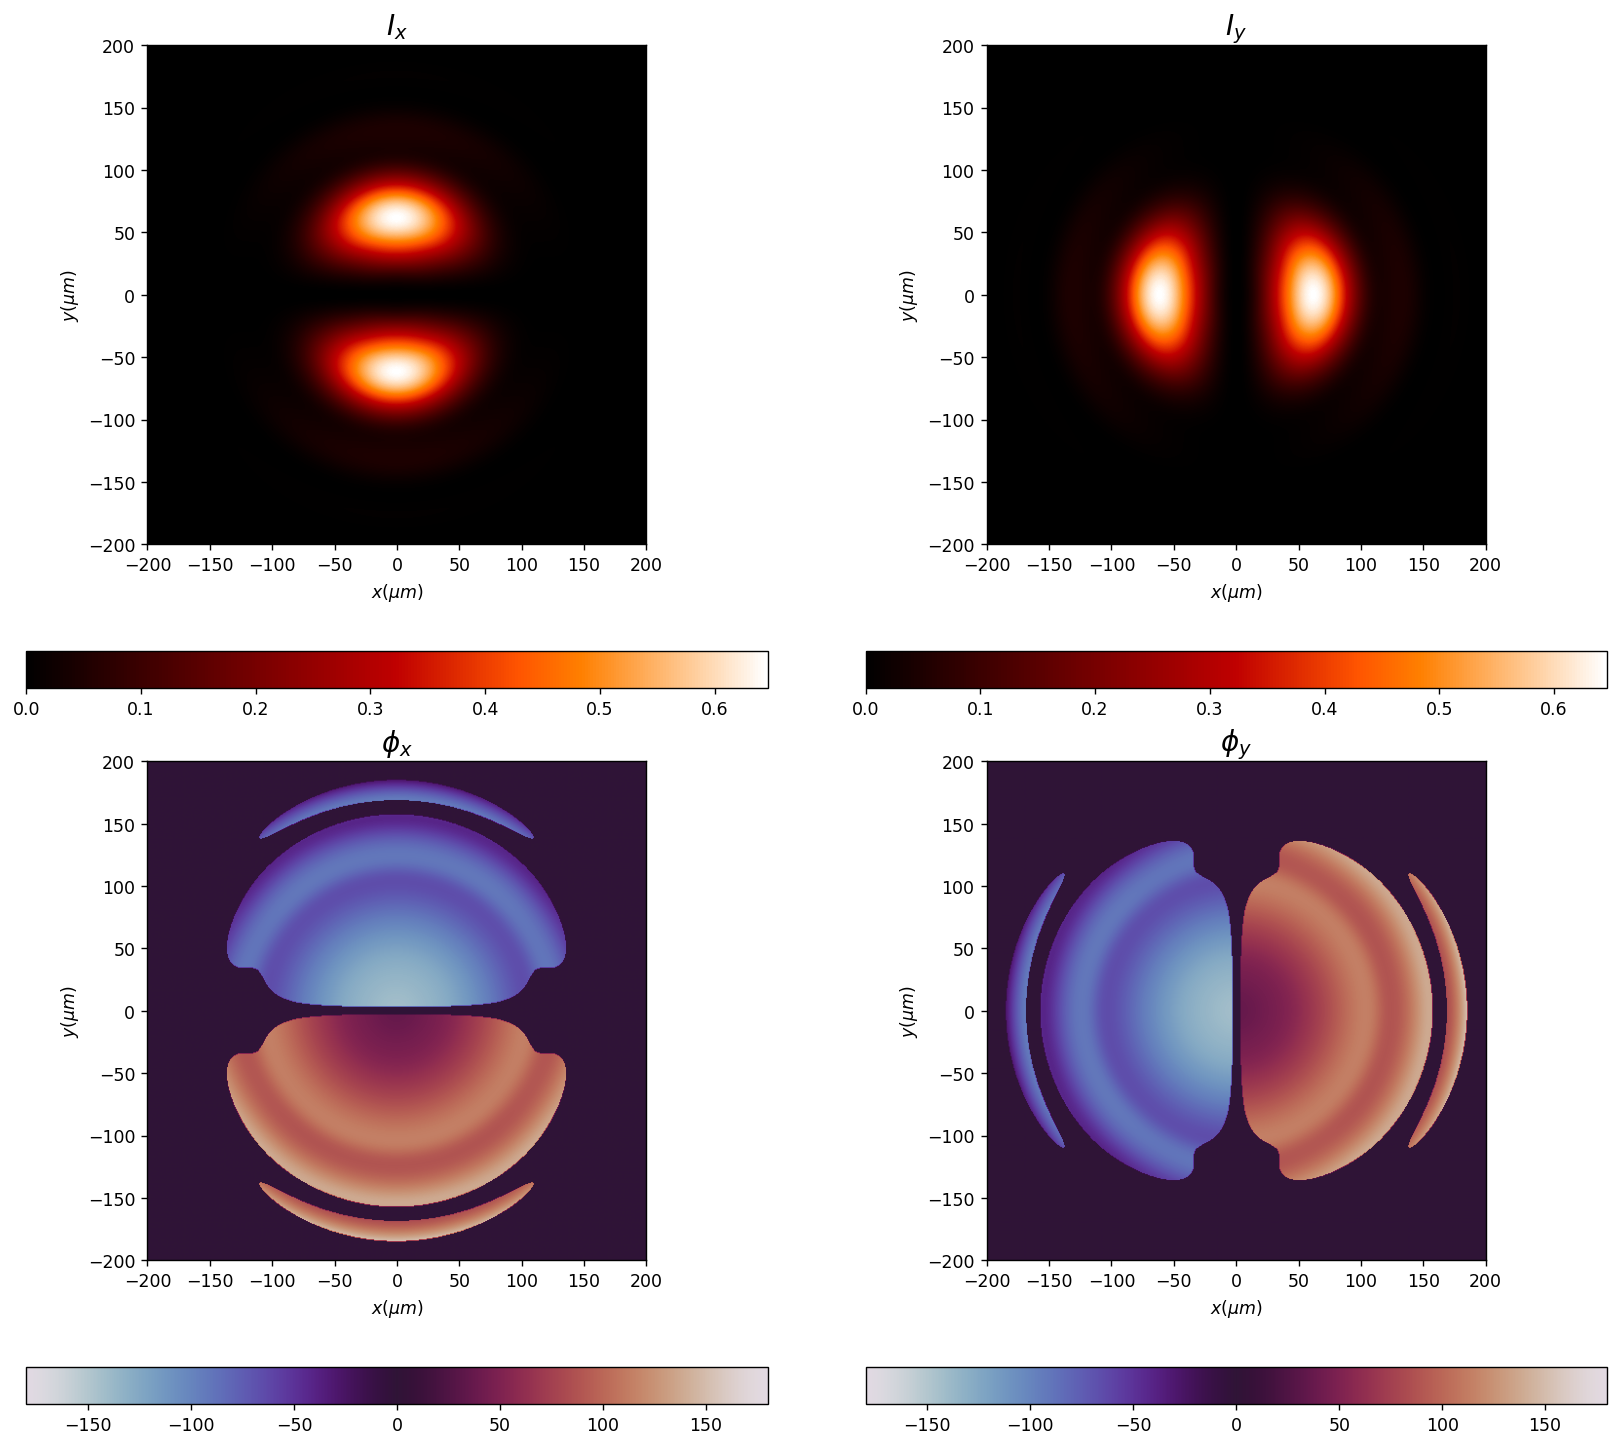

In [7]:
#EM.__draw_field__();
EM.draw(kind='fields');

## Draw Stokes

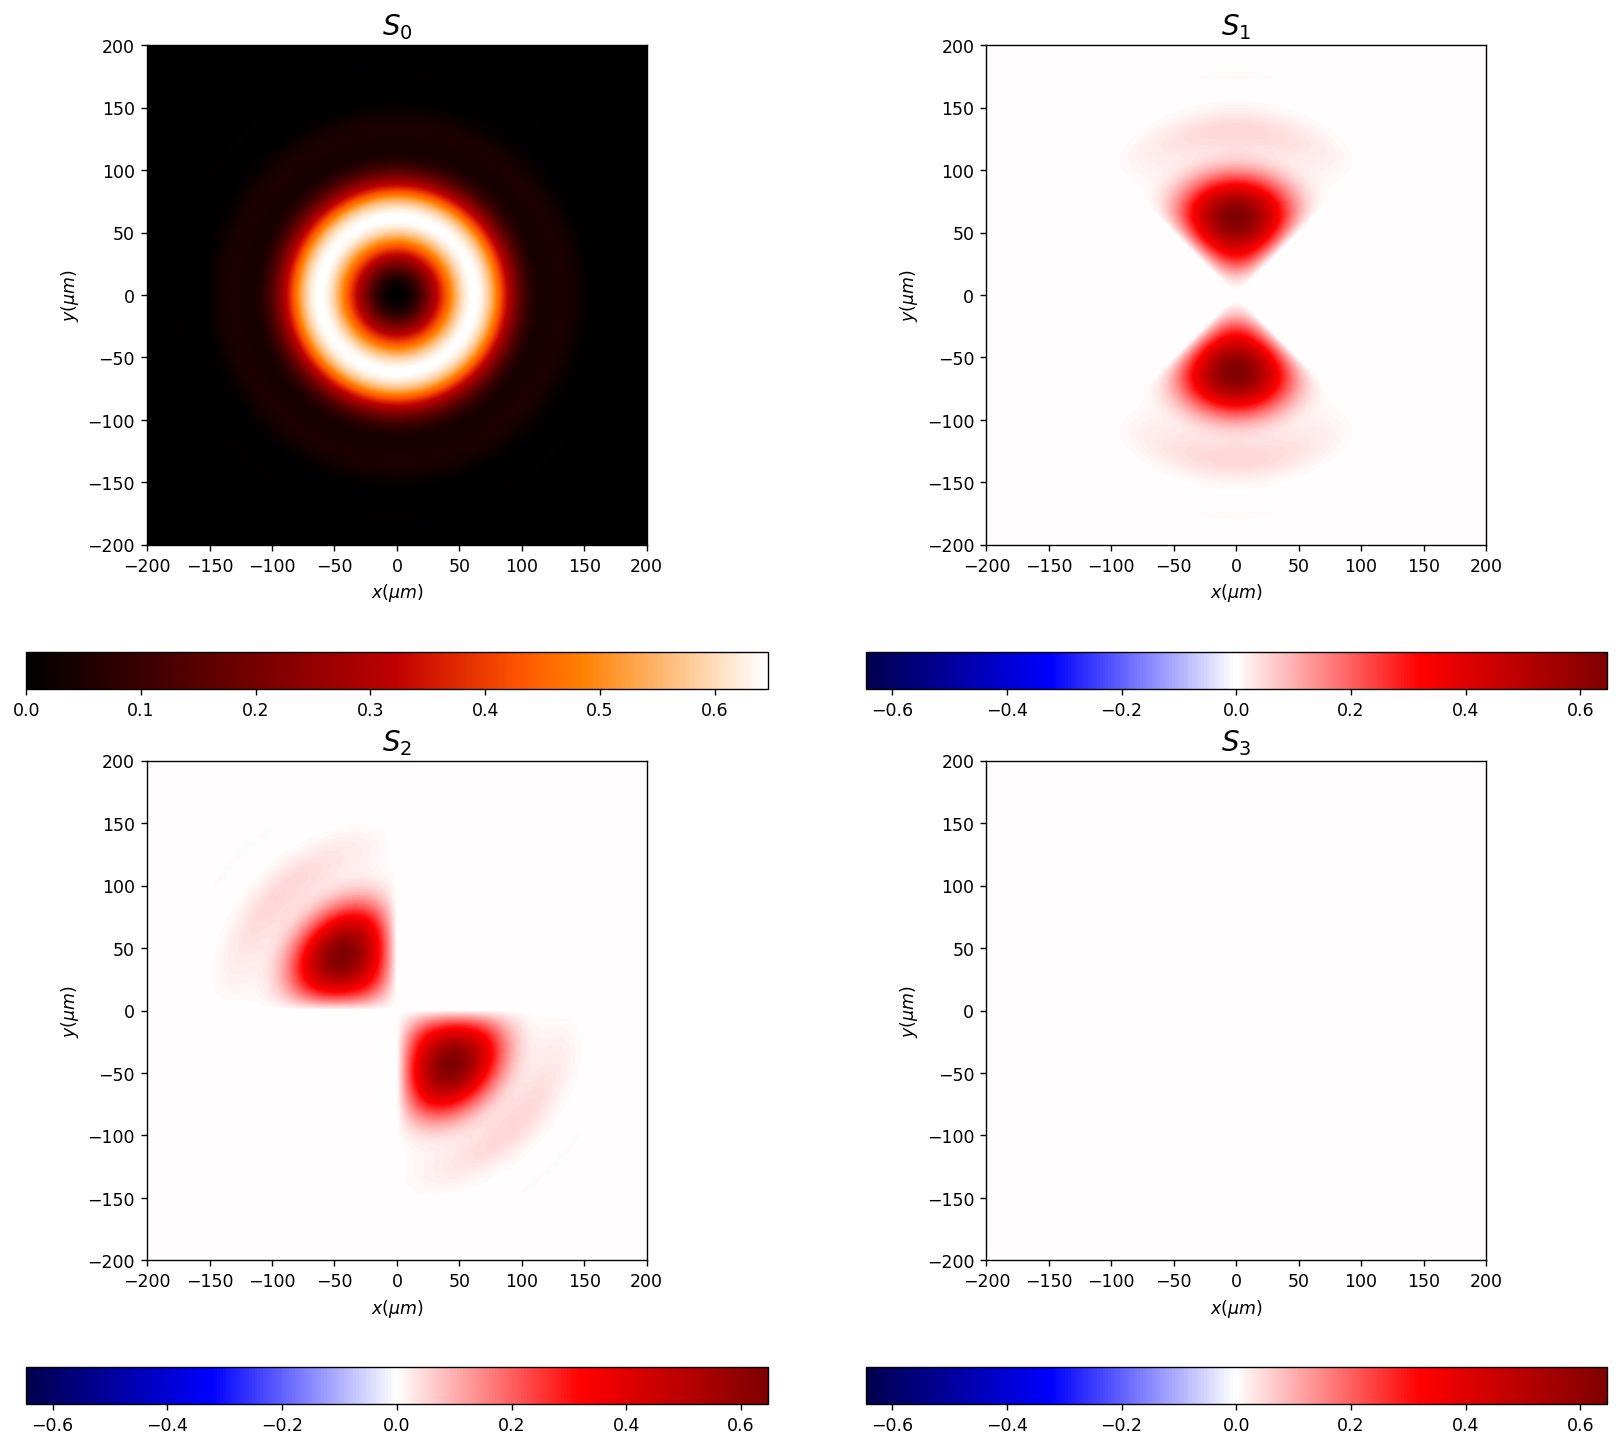

In [8]:
EM.draw(kind='stokes');

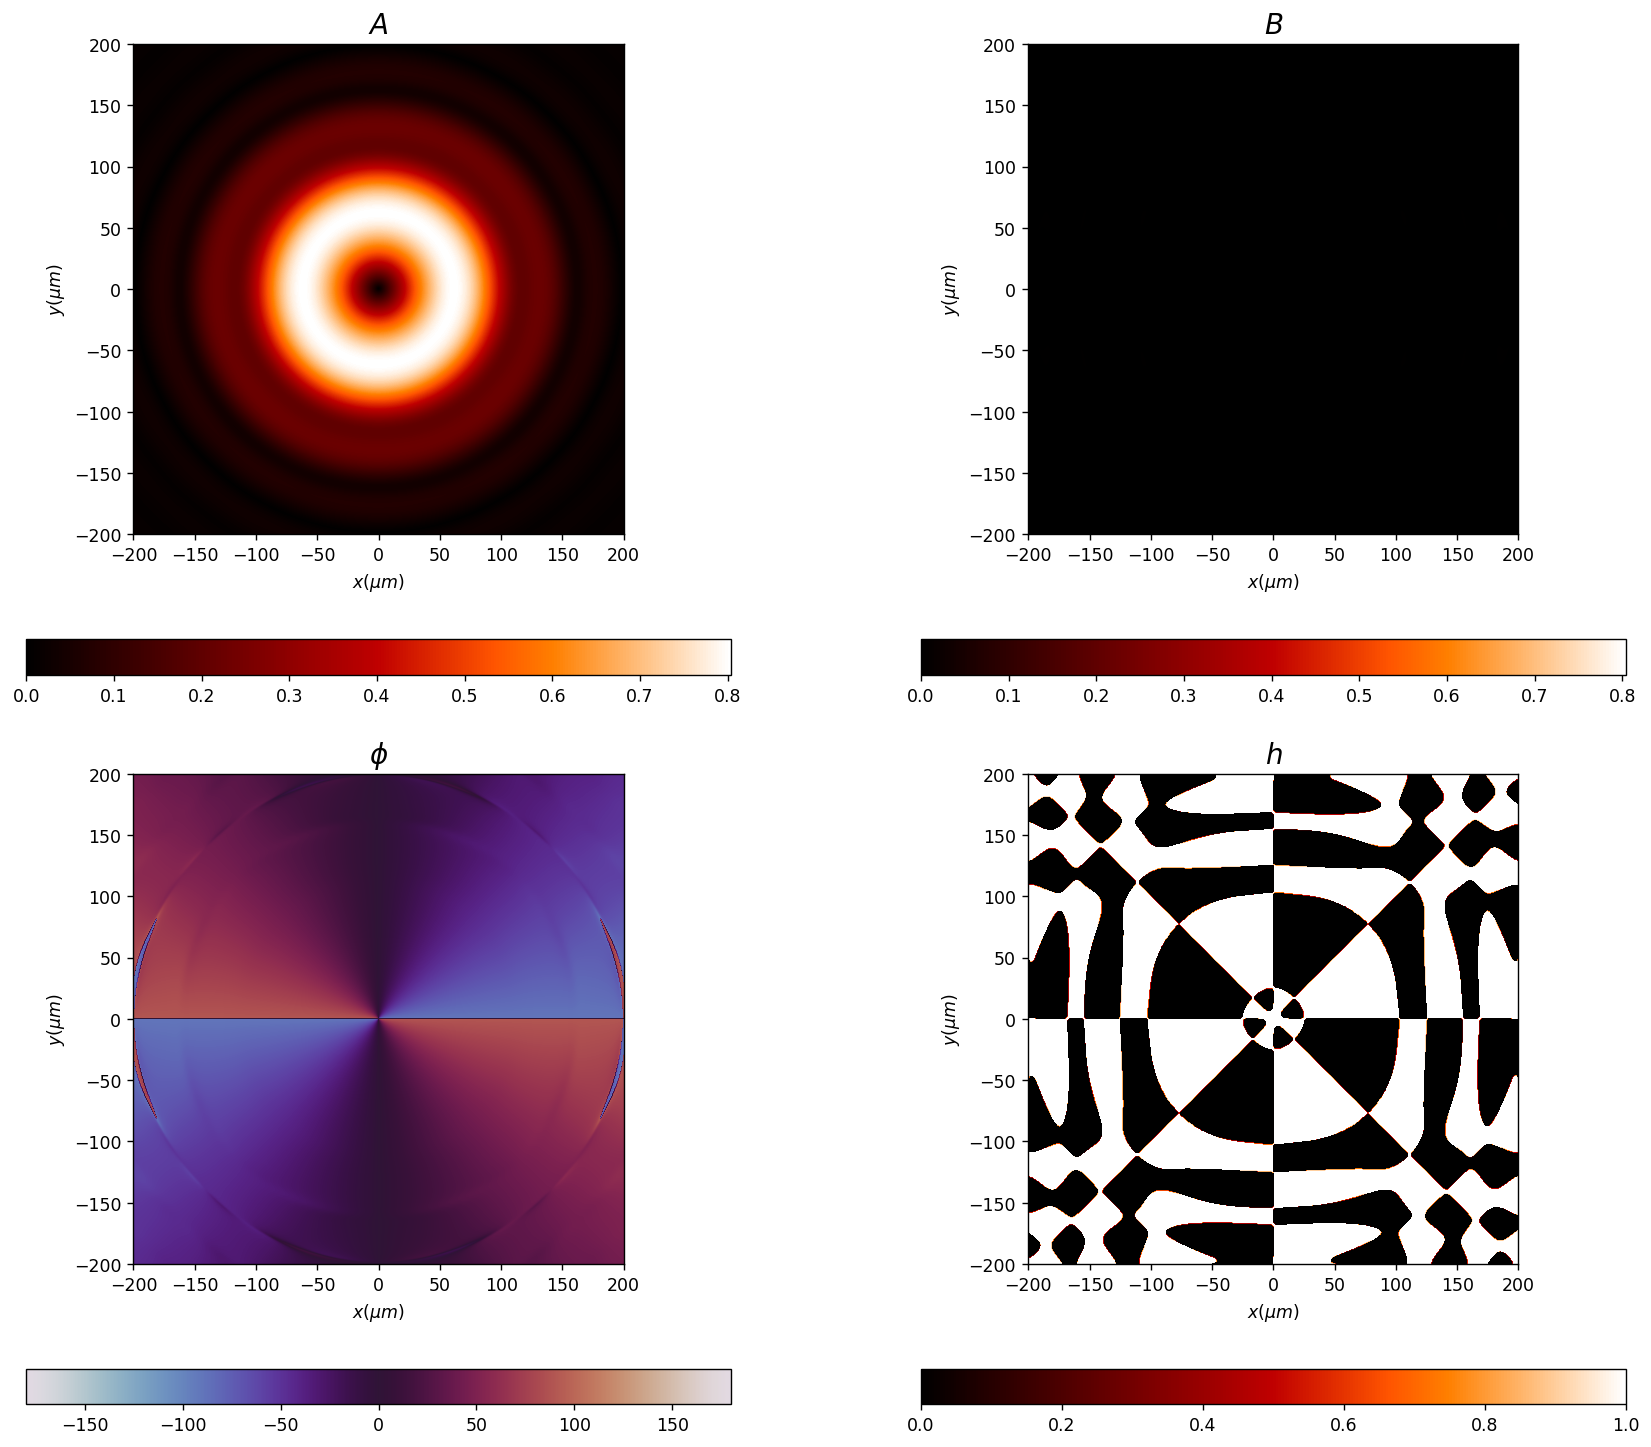

In [9]:
#EM.__draw_param_ellipse__();
EM.draw(kind='param_ellipse');

## Polarizations ellipses

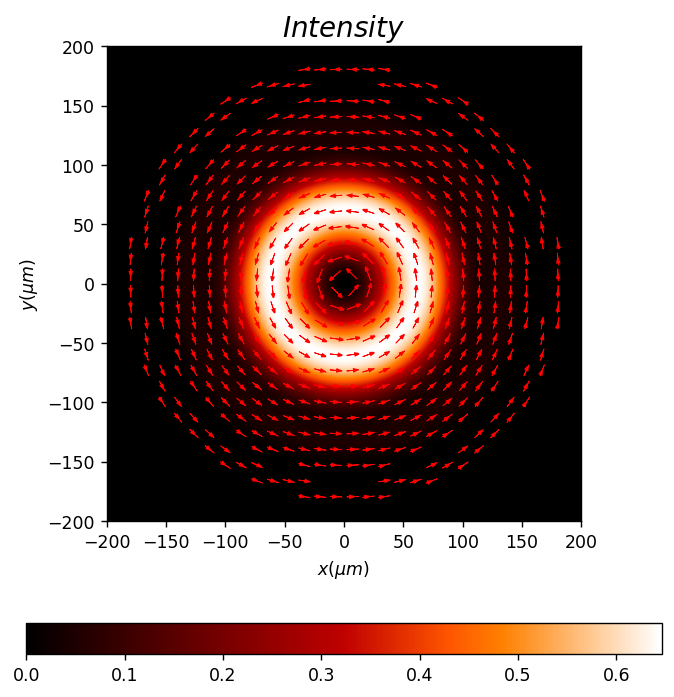

In [10]:
EM.__draw_ellipses__(
    logarithm=False,
    normalize=False,
    cut_value=False,
    num_ellipses=(30, 30),
    amplification=0.75,
    color_line='r',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=False)

This polarizaation ellipses can also be drawn at any other drawing, provided that we have the axis associated to this drawing

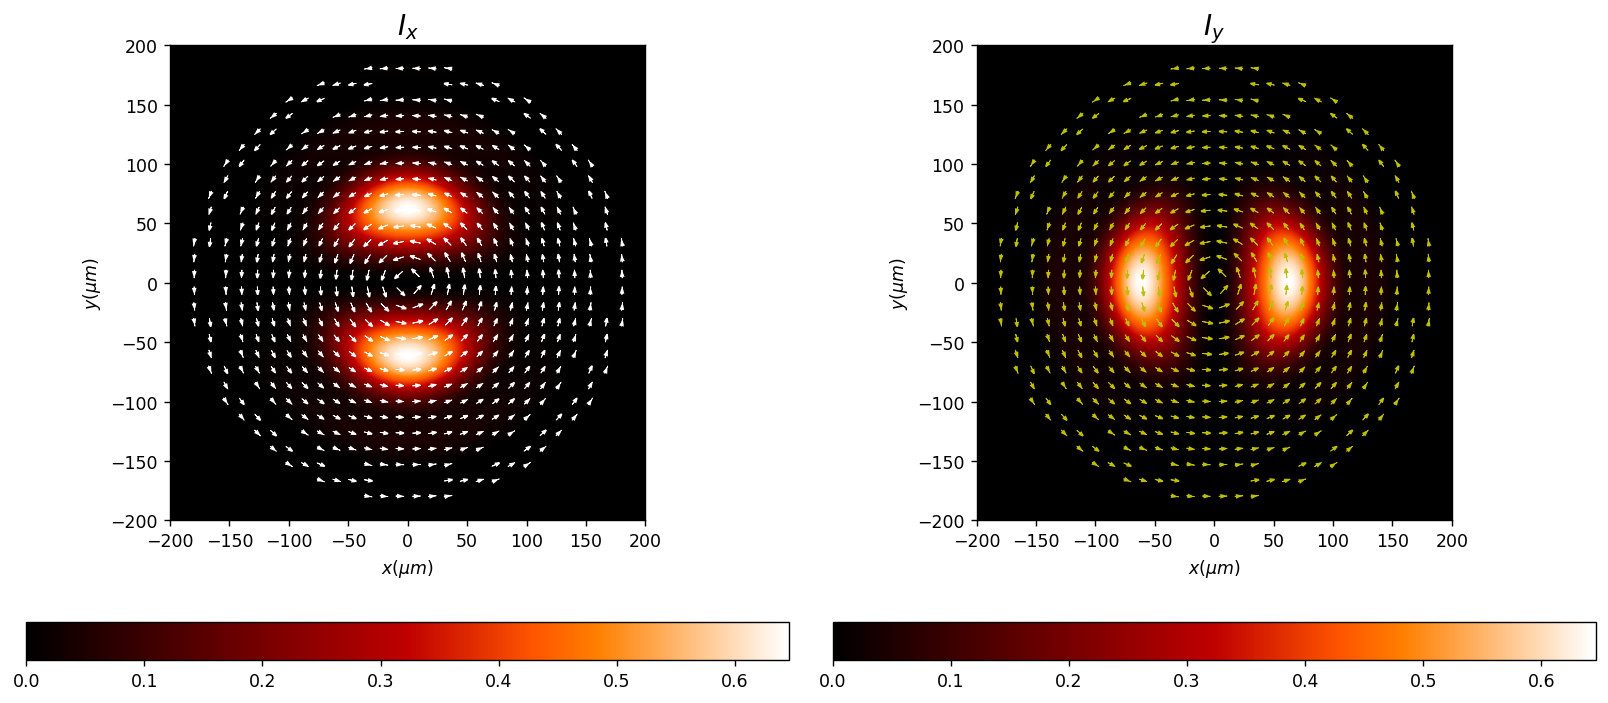

In [11]:
h1,h2=EM.draw(kind='intensities')
EM.__draw_ellipses__(
    logarithm=False,
    normalize=False,
    cut_value=False,
    num_ellipses=(30, 30),
    amplification=0.5,
    color_line='w',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=h1)

EM.__draw_ellipses__(
    logarithm=False,
    normalize=False,
    cut_value=False,
    num_ellipses=(30, 30),
    amplification=0.5,
    color_line='y',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=h2)
plt.tight_layout()

## Other way

In [12]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)

wavelength = 0.6328 * um

Scalar source

In [13]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

Vector source

In [14]:
EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.transversal_wave(u=u0, r0=(0,0), radius=(200,200))

If we need, we can convert the $E_x$ and $E_y$ fields in Scalar_field_XY.

In [15]:
Ex,Ey=EM.get()
print(Ex)

Scalar_field_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -125.00 um,  xmax:      125.00 um
 - ymin:       -125.00 um,  ymax:      125.00 um
 - Imin:       0.00,     Imax:      0.99
 - phase_min:  -180.00 deg, phase_max: 0.00 deg
 - wavelength: 0.63 um
 - date:       2021-05-08_19_05_47
 - info:       



We can obtain a variety of representation, simply using the draw method.

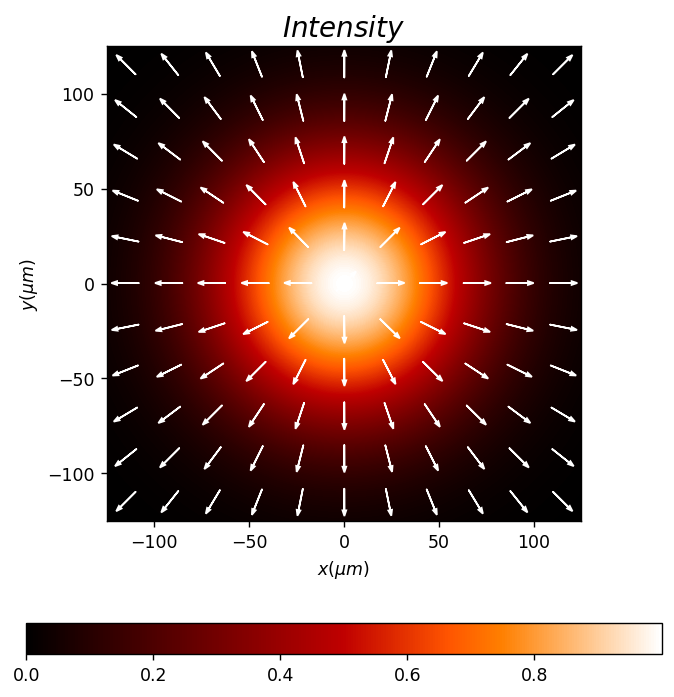

In [16]:
EM.draw(kind='ellipses')

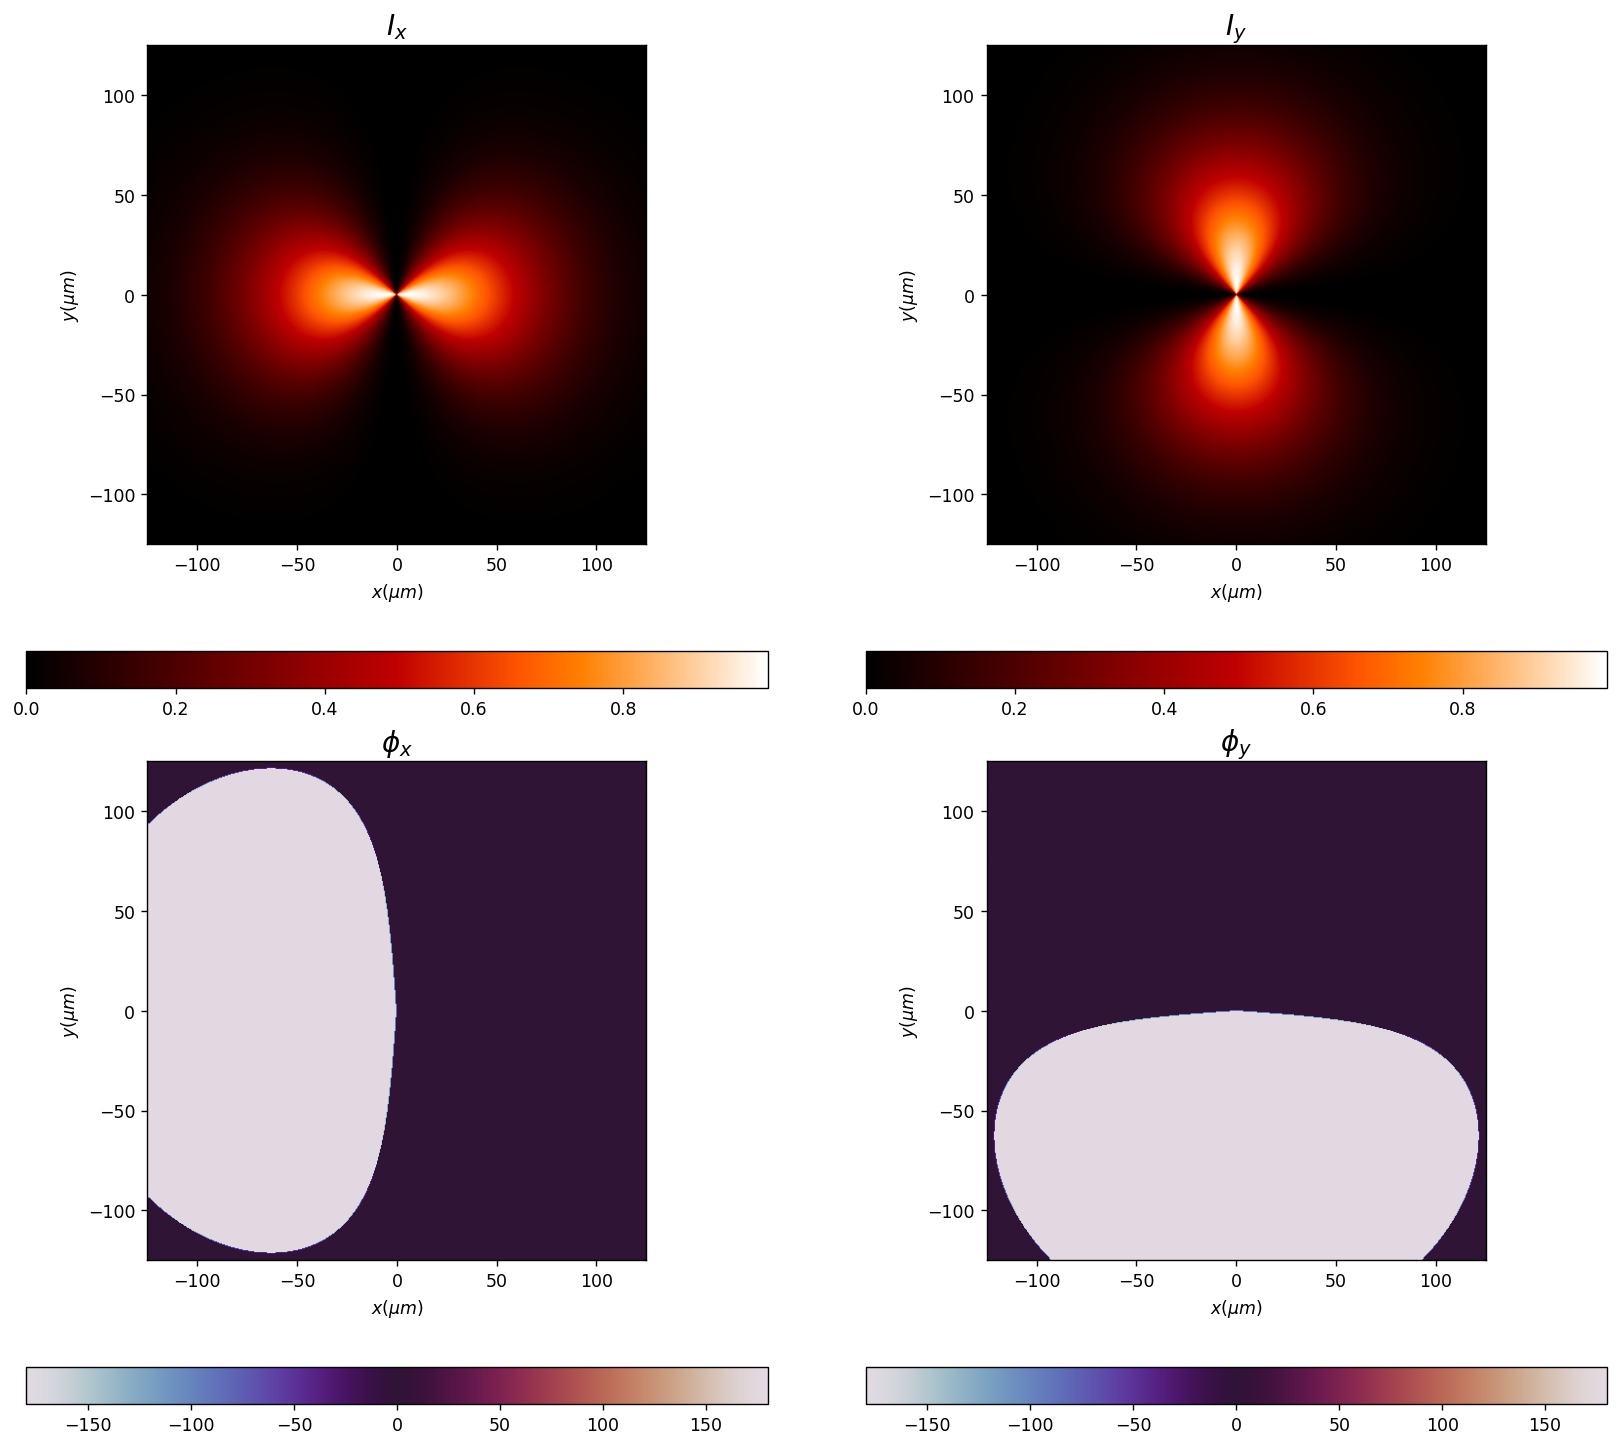

In [17]:
EM.draw(kind='fields');

Polarimetric representation can be performed in a simple way.

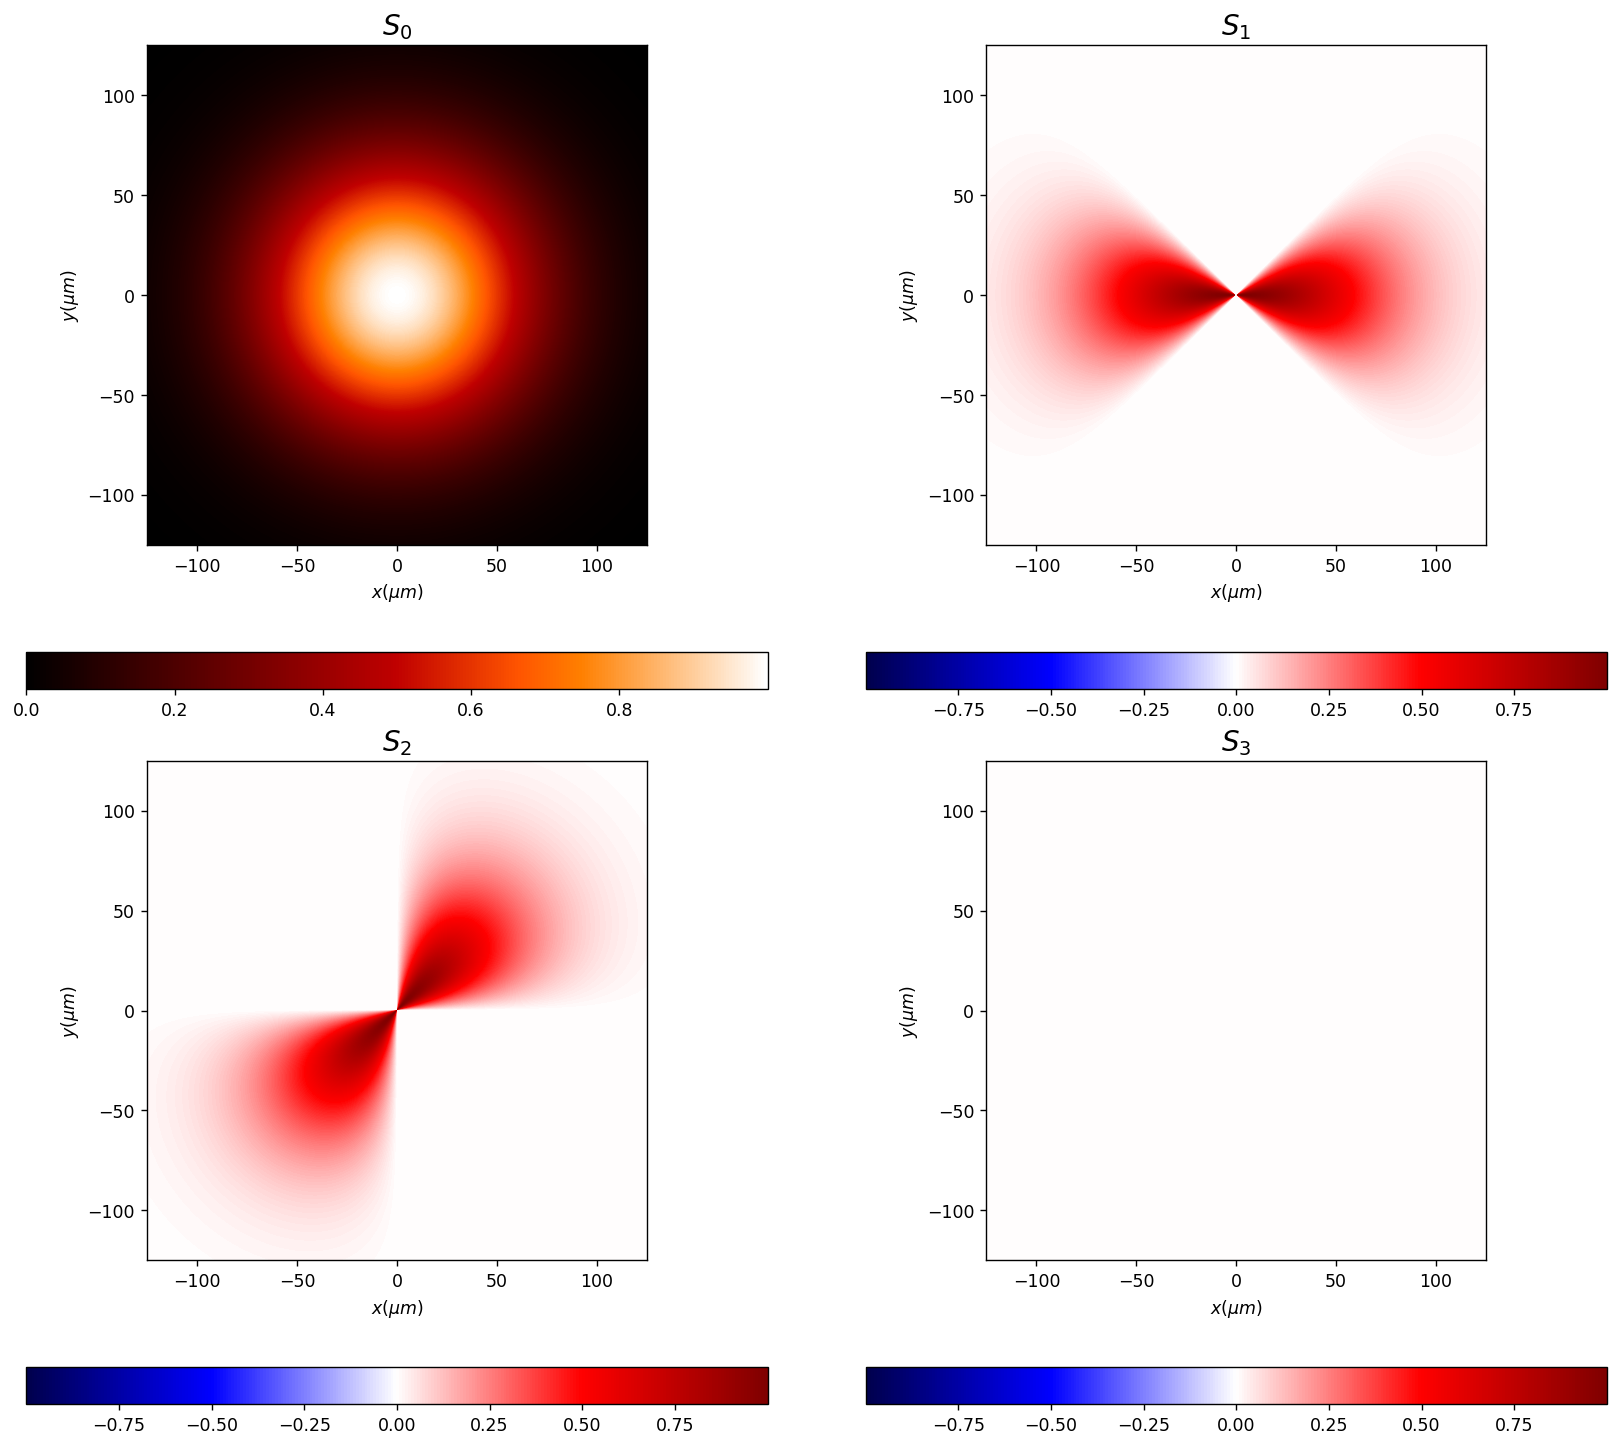

In [18]:
EM.draw('stokes');

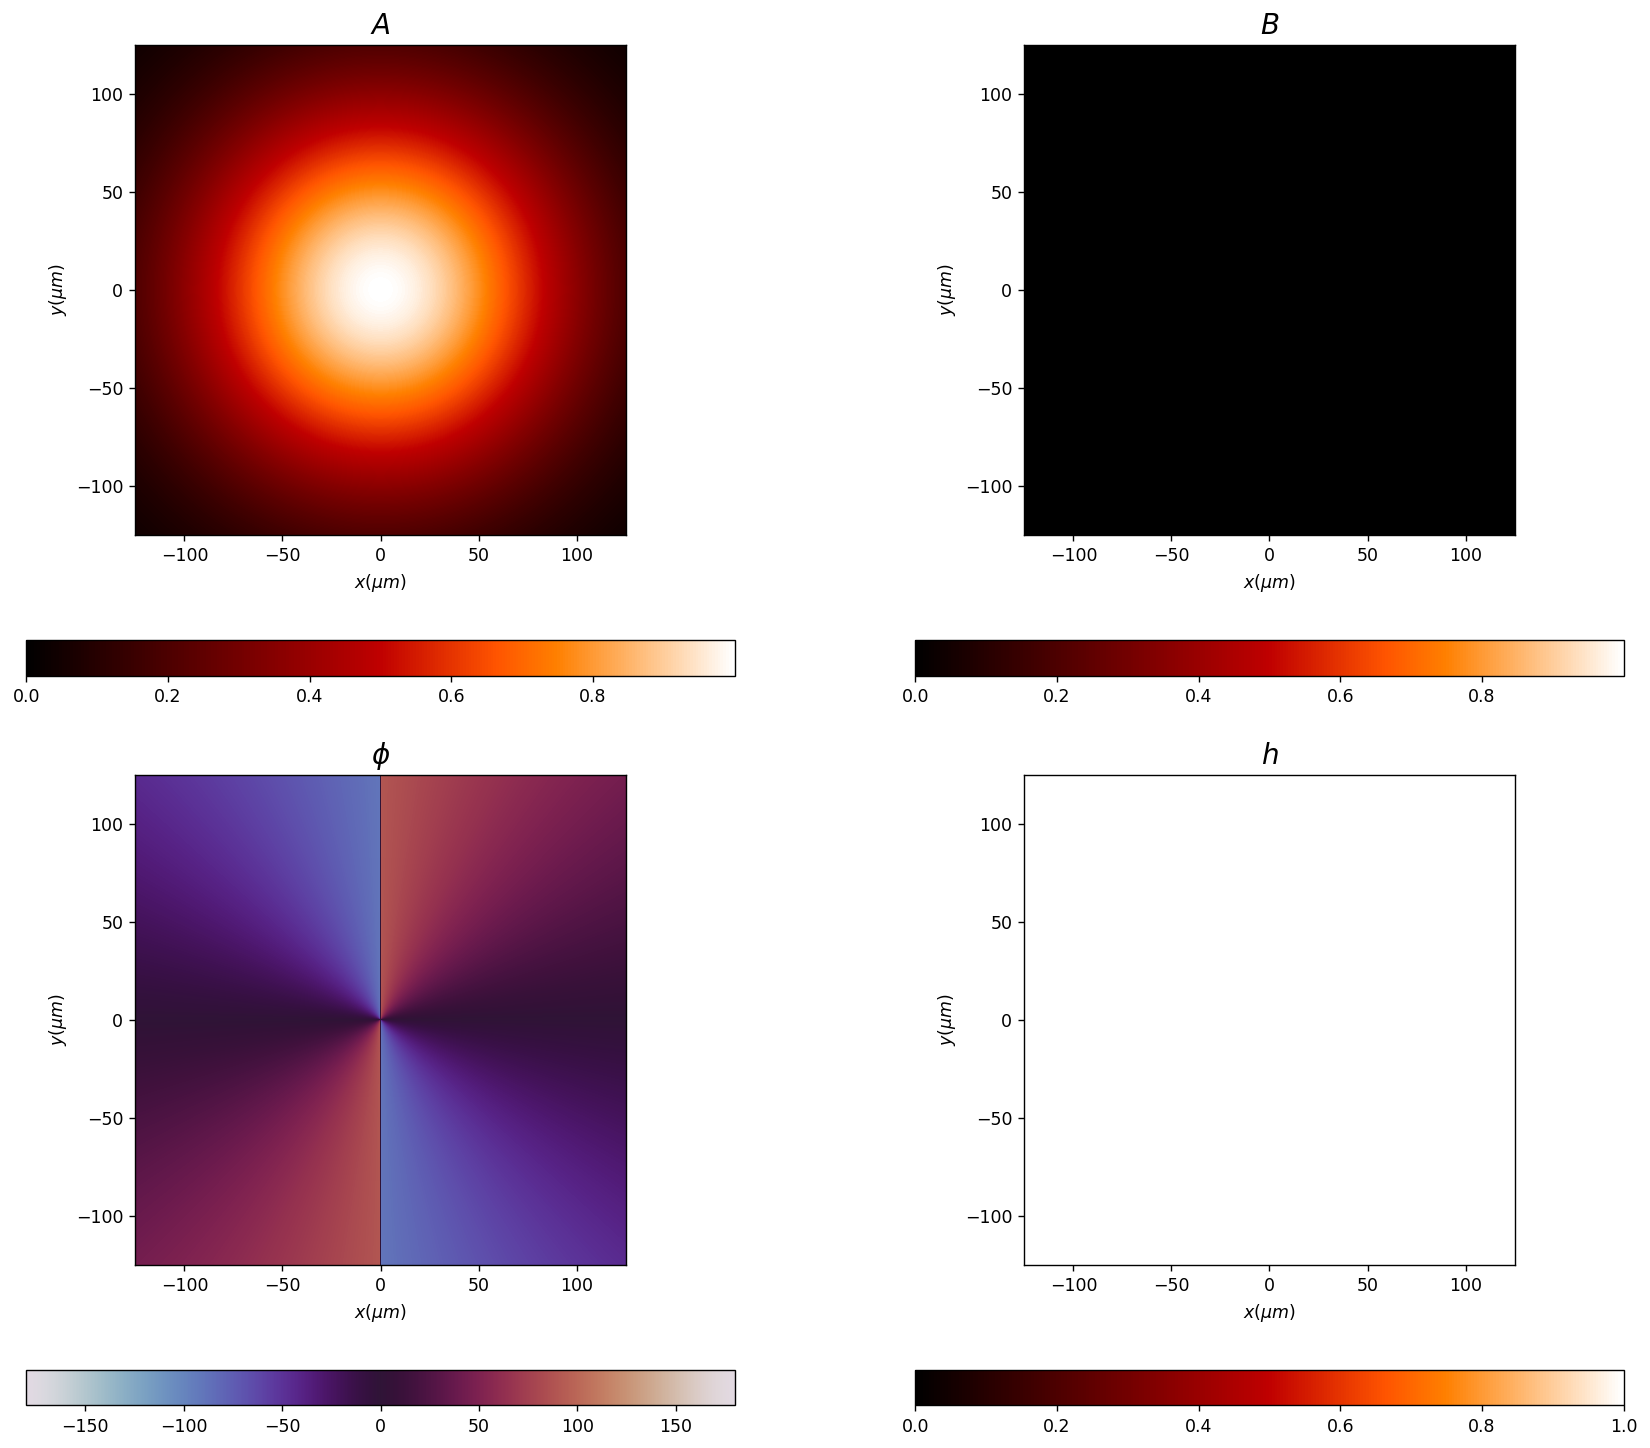

In [19]:
EM.draw('param_ellipse');